In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

df.head() 
df.describe() 

df.isnull().sum() 


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

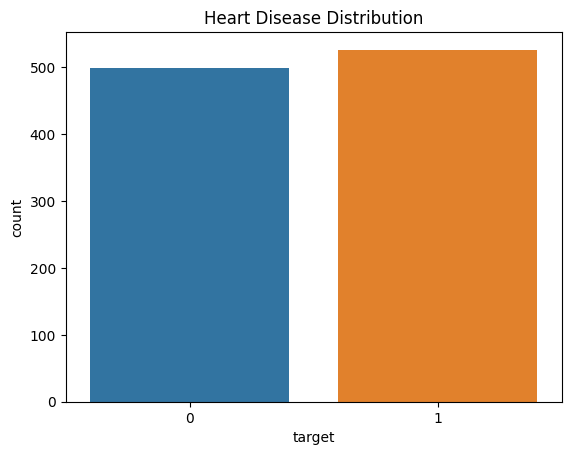

In [3]:

sns.countplot(x='target', data=df)  
plt.title('Heart Disease Distribution')
plt.show()

In [4]:
df.head() 

df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

df.head() 
df.columns 

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2',
       'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [5]:
# Normalize/Standardize Numerical Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features].head() 
df[numerical_features].describe()  

df[numerical_features] = scaler.fit_transform(df[numerical_features]) 

df[numerical_features].describe() 

,age,trestbps,chol,thalach,oldpeak
count,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03,1.025000e+03
mean,-3.431402e-16,-7.036106e-16,-3.466062e-18,-4.332578e-16,-2.426243e-16
std,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00,1.000488e+00
min,-2.804866e+00,-2.148237e+00,-2.327054e+00,-3.397080e+00,-9.123291e-01
25%,-7.095548e-01,-6.632165e-01,-6.787242e-01,-7.442713e-01,-9.123291e-01
50%,1.726817e-01,-9.205458e-02,-1.163527e-01,1.255019e-01,-2.311765e-01
75%,7.240794e-01,4.791073e-01,5.623715e-01,7.343432e-01,6.202642e-01
max,2.488552e+00,3.906079e+00,6.166694e+00,2.299935e+00,4.366603e+00


In [6]:

# Split the Data
from sklearn.model_selection import train_test_split
X = df.drop('target', axis=1)
X.head() 

y = df['target']
y.head(10) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [7]:
# Train and Evaluate Models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [8]:
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test) 

print('Accuracy: ', accuracy_score(y_test, y_predicted)) 
print('Confusion Matrix:\n ', confusion_matrix(y_test, y_predicted))
print('Classification Report:\n ', classification_report(y_test, y_predicted))

Accuracy:  0.8195121951219512
Confusion Matrix:
  [[76 26]
 [11 92]]
Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [9]:

# 2. Gradient Boosting (XGBoost) 

from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_predicted))
print('Classification Report: \n', classification_report(y_test, y_predicted))

Accuracy:  0.9853658536585366
Confusion Matrix: 
 [[102   0]
 [  3 100]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [10]:
# 3. Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier( n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

model.fit(X_train, y_train)
y_predicted = model.predict(X_test) 

print('Accuracy:', accuracy_score(y_test, y_predicted) )
print('Confusion Matrix: \n', confusion_matrix(y_test, y_predicted))
print('Classification Report:\n ', classification_report(y_test, y_predicted))


Accuracy: 0.9853658536585366
Confusion Matrix: 
 [[102   0]
 [  3 100]]
Classification Report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Hey there! 👋

If you find any issues or have suggestions for improvement in this notebook, I'd love to hear from you! I'm still learning, so your feedback is incredibly valuable to me. 

Feel free to leave a comment or reach out. Thanks in advance for your help! 😊